## 6.5 Machine Learning

## Notebook contents:

### 1. import dictionaries and clean/organize data

### 2. elbow technique

### 3. k-means clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
path = '/Users/rachelallen/CareerFoundry Achievement 6'

In [4]:
#import data

df = pd.read_pickle(os.path.join(path, '02 Original Data', '02 cleaned data', 'shanghai_barrolee_GDP.pkl'))

In [5]:
df.head()

,world_rank,university_name,national_rank,total_score,alumni,award,highly_cited,nature_science_pub,papers_cited,weighted_score,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#it can only use numerical values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480081 entries, 0 to 480080
Data columns (total 89 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   world_rank          396583 non-null  object  
 1   university_name     463170 non-null  object  
 2   national_rank       396582 non-null  object  
 3   total_score         63957 non-null   float64 
 4   alumni              396582 non-null  float64 
 5   award               396581 non-null  float64 
 6   highly_cited        396581 non-null  float64 
 7   nature_science_pub  394427 non-null  float64 
 8   papers_cited        396581 non-null  float64 
 9   weighted_score      396581 non-null  float64 
 10  year_x              396583 non-null  float64 
 11  Score category      63957 non-null   object  
 12  country             478198 non-null  object  
 13  _merge              463171 non-null  category
 14  BLcode              476970 non-null  float64 
 15  year_y           

In [11]:
df = df.drop(columns = ['world_rank', 'university_name', 'national_rank', 'WBcode', 'region_code', 'Score category', 'country', '_merge', 'sex', 'flag', 'Country Code', 'Indicator Name', 'Indicator Code'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480081 entries, 0 to 480080
Data columns (total 76 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   total_score         63957 non-null   float64
 1   alumni              396582 non-null  float64
 2   award               396581 non-null  float64
 3   highly_cited        396581 non-null  float64
 4   nature_science_pub  394427 non-null  float64
 5   papers_cited        396581 non-null  float64
 6   weighted_score      396581 non-null  float64
 7   year_x              396583 non-null  float64
 8   BLcode              476970 non-null  float64
 9   year_y              476970 non-null  float64
 10  agefrom             476970 non-null  float64
 11  ageto               476970 non-null  float64
 12  no_school           476970 non-null  float64
 13  some_pri            476970 non-null  float64
 14  complete_pri        476970 non-null  float64
 15  some_sec            476970 non-nul

In [13]:
#I don't know if I need to drop null values for this but a quick google suggests that I should

df.isnull().sum()

total_score           416124
alumni                 83499
award                  83500
highly_cited           83500
nature_science_pub     85654
                       ...  
2017                   62088
2018                   63068
2019                  415838
2020                  421720
2021                  478318
Length: 76, dtype: int64

In [14]:
df.shape

(480081, 76)

In [15]:
#drop nulls

df1 = df.dropna()

In [16]:
df1.shape

(0, 76)

In [19]:
#well that won't work, good thing I tested that

df2 = df[df['total_score'].notna()]
df2 = df[df['alumni'].notna()]
df2 = df[df['award'].notna()]
df2 = df[df['highly_cited'].notna()]
df2 = df[df['nature_science_pub'].notna()]

In [20]:
df2.shape

(394427, 76)

In [21]:
df2.isnull().sum()

total_score           330470
alumni                     0
award                      0
highly_cited               0
nature_science_pub         0
                       ...  
2017                   48692
2018                   48692
2019                  351917
2020                  352307
2021                  394427
Length: 76, dtype: int64

In [23]:
# I don't want to drop a million rows so I'm going to fill some with median values instead

df2['2021'] = df['2021'].fillna(df['2021'].median())
df2['2020'] = df['2020'].fillna(df['2020'].median())
df2['2019'] = df['2019'].fillna(df['2019'].median())
df2['2018'] = df['2018'].fillna(df['2018'].median())
df2['2017'] = df['2017'].fillna(df['2017'].median())
df2['2016'] = df['2016'].fillna(df['2016'].median())

/var/folders/sg/643_lsvj2pj89g1m5qn18t800000gp/T/ipykernel_13538/2299973126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['2021'] = df['2021'].fillna(df['2021'].median())
/var/folders/sg/643_lsvj2pj89g1m5qn18t800000gp/T/ipykernel_13538/2299973126.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['2020'] = df['2020'].fillna(df['2020'].median())
/var/folders/sg/643_lsvj2pj89g1m5qn18t800000gp/T/ipykernel_13538/2299973126.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [25]:
#for the purposes of practicing I'm going to drop some of these colunns

df_small = df2[['total_score', 'alumni', 'award', 'nature_science_pub', 'highly_cited', '2016', '2017', '2018', '2019', '2020', '2021']]

In [27]:
df_small.shape

(394427, 11)

In [29]:
df_small.isnull().sum()

total_score           330470
alumni                     0
award                      0
nature_science_pub         0
highly_cited               0
2016                       0
2017                       0
2018                       0
2019                       0
2020                       0
2021                       0
dtype: int64

In [32]:
#I really don't want to drop 330,000 out of 394,000 rows so I'm going to impute the median instead, even though that's not very accurate

df_small['total_score'] = df_small['total_score'].fillna(df_small['total_score'].median())


/var/folders/sg/643_lsvj2pj89g1m5qn18t800000gp/T/ipykernel_13538/460844008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['total_score'] = df_small['total_score'].fillna(df_small['total_score'].median())


### 2. elbow technique

In [33]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [34]:
score = [kmeans[i].fit(df_small).score(df_small) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-181608268.6528024,
 -104411509.62102434,
 -68260447.81742644,
 -53656534.99559766,
 -45151820.86292632,
 -38559092.5891325,
 -32887007.489822008,
 -29131856.027966414,
 -26346368.123823583]

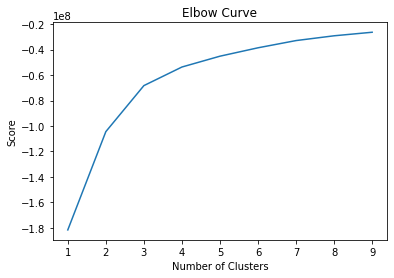

In [35]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Looks like either 3 or 4 is where mine flattens out. I'm going to choose 4 since it looks like that's where it gets flattest.

### 3. K-means clustering

In [36]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 


In [37]:
# Fit the k-means object to the data.

kmeans.fit(df_small)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [38]:
df_small['clusters'] = kmeans.fit_predict(df_small)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/sg/643_lsvj2pj89g1m5qn18t800000gp/T/ipykernel_13538/3963459991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['clusters'] = kmeans.fit_predict(df_small)


In [39]:
df_small.head()

,total_score,alumni,award,nature_science_pub,highly_cited,2016,2017,2018,2019,2020,2021,clusters
0,100.0,100.0,100.0,100.0,100.0,4.92646,5.01561,4.97577,3.54,3.57,6.02747,3
1,100.0,100.0,100.0,100.0,100.0,4.92646,5.01561,4.97577,3.54,3.57,6.02747,3
2,100.0,100.0,100.0,100.0,100.0,4.92646,5.01561,4.97577,3.54,3.57,6.02747,3
3,100.0,100.0,100.0,100.0,100.0,4.92646,5.01561,4.97577,3.54,3.57,6.02747,3
4,100.0,100.0,100.0,100.0,100.0,4.92646,5.01561,4.97577,3.54,3.57,6.02747,3


In [40]:
df_small['clusters'].value_counts()

1    243122
2     85334
0     61568
3      4403
Name: clusters, dtype: int64

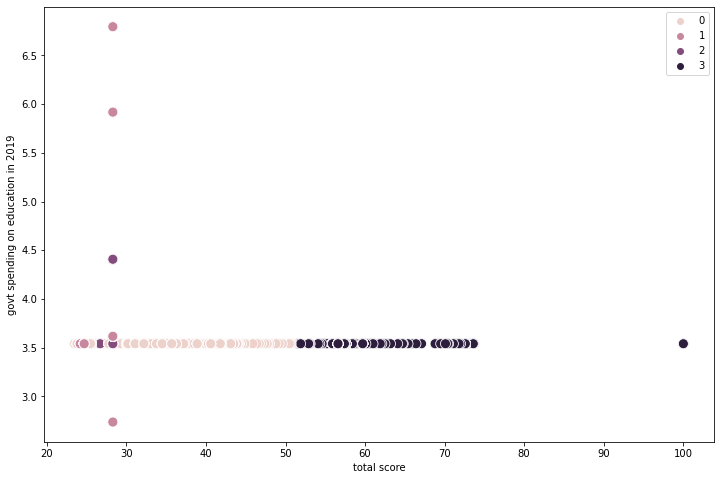

In [41]:
# Plot the clusters for the "total_score" and "2019" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_small['total_score'], y=df_small['2019'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total score') # Label x-axis.
plt.ylabel('govt spending on education in 2019') # Label y-axis.
plt.show()

This cluster honestly doesn't make any sense to me, although I guess it's clear that the higher scores are all part of one cluster, and there's another cluster of scores from 30 to about 53. Also there's just the one outlier up at 100.

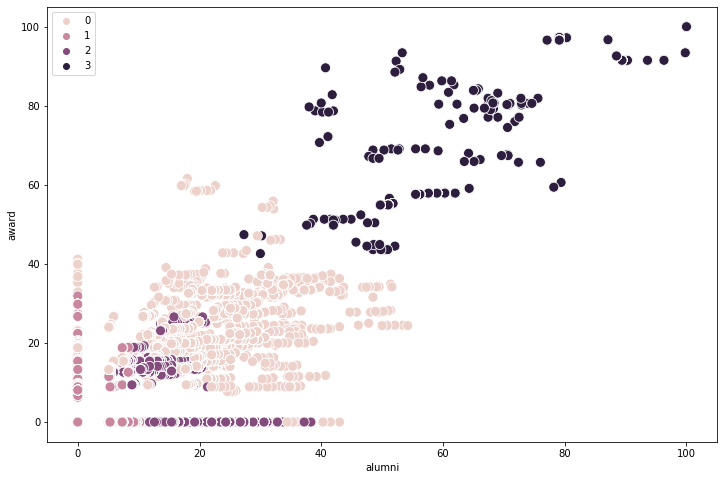

In [43]:
# Plot the clusters for the "alumni" and "award" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_small['alumni'], y=df_small['award'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('alumni') 
plt.ylabel('award') 
plt.show()

This one is a lot more interesting and makes a lot more sense. There's a cluster of high awarded universities that also have extremely successful and awarded alumni. There's another pretty large mid-range cluster.

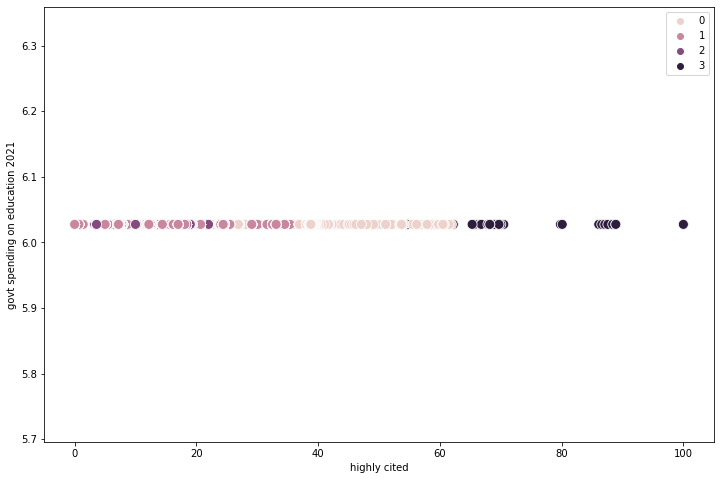

In [44]:
# Plot the clusters for the "highly_cited" and "2021" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_small['highly_cited'], y=df_small['2021'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('highly cited') 
plt.ylabel('govt spending on education 2021') 
plt.show()

There is something interesting here, with 3 being mostly with the highly cited papers and 0 being very much in the middle

Another cluster that is very confusing. Looks like the highly cited papers are all in one cluster, and there's a middle group, but the other two clusters are mixed together below 40.

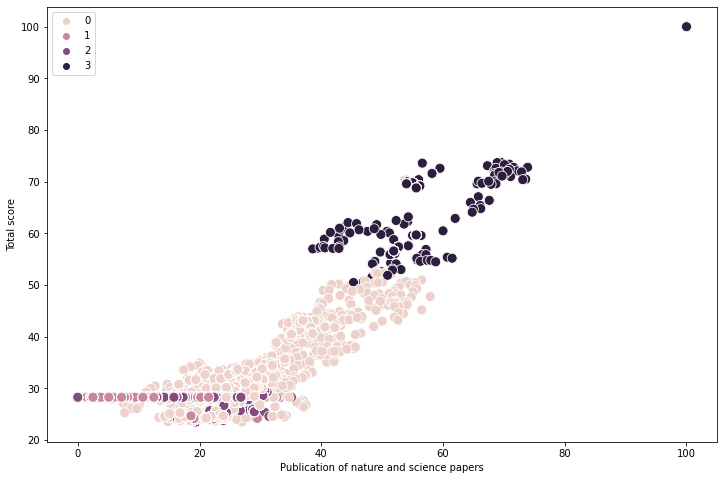

In [45]:
# Plot the clusters for the "Nature_science_pub" and "total_score" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_small['nature_science_pub'], y=df_small['total_score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Publication of nature and science papers') 
plt.ylabel('Total score') 
plt.show()

interesting! there's some clear correlations here with the dark 3 grouping and the 0 group being in the middle. Looks like there's a cluster of high scoring universities that also pulibhs a ton of nature and science papers, and then a very large mid-range cluster of universities. 

In [49]:
df_small.loc[df_small['clusters'] == 2, 'cluster'] = 'dark purple'
df_small.loc[df_small['clusters'] == 1, 'cluster'] = 'purple'
df_small.loc[df_small['clusters'] == 0, 'cluster'] = 'pink'
df_small.loc[df_small['clusters'] == 3, 'cluster'] = 'maroon'

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [50]:
df_small.groupby('cluster').agg({'nature_science_pub':['mean', 'median'], 
                         'alumni':['mean', 'median'], 
                         'total_score':['mean', 'median'],
                         '2019':['mean', 'median'],
                         '2020':['mean', 'median'],
                         'highly_cited':['mean', 'median']})

nature_science_pub            alumni        total_score         \
                          mean median       mean median        mean median   
cluster                                                                      
dark purple          14.087650   13.4  15.723108   14.8   28.105984   28.3   
maroon               54.053441   54.1  71.499160   64.3   63.747059   62.1   
pink                 23.065757   21.1  19.457522   20.4   29.755798   28.3   
purple                9.907387    9.6   0.150836    0.0   28.279973   28.3   

                 2019             2020        highly_cited         
                 mean median      mean median         mean median  
cluster                                                            
dark purple  3.645216   3.54  3.685945   3.57    10.791545   10.3  
maroon       3.540000   3.54  3.570000   3.57    51.644765   52.3  
pink         3.540000   3.54  3.570000   3.57    23.284016   22.8  
purple       3.585246   3.54  3.620475   3.57     8.698235    7.9

The purple cluster scores lowest in everything overall. It has the lowest publishing in science magazines, the lowest alumni scores, the lowest funding (which is the same all over) and the fewest citations. Then there is a low-mid group of dark purple, and a high-mid group in pink. Finally the dark maroon color scores highest everywhere (except funding). 

It seems (just like we saw with the correlation charts two exercises ago) that fuunding doesn't have the impact on success that you'd expect. You do see clusters of high ranks -- if something is high ranked in one of these categories it tends to be higher ranked across the board, and vice versa. So it's not one factor having an impact, it's all of them. 

### Propose what these results could be useful for in future steps of an analytics pipeline.

It's really interesting that there seems to be no connection between GDP spending on education and the performance of higher education success for universities. Maybe that's because government spending tends to be focused on elementary schools or even secondary schools, depending on the country. A factor like "median income per family in the country" would be a very interesting metric to compare to university success, or "number of people living in poverty per country." Since universities that are succeeding on one metric tend to be succeeding on all of them or very few of them collectively, it makes sense to look at other factors in the country (how many women are educated, how many universities are available, private vs. public funding for univierties, etc.) that might have stronger correlations. 